In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler
from utilities.plotting import histogram, boxplot, scatterplot, plot_imputations, barplot

pd.set_option("float_format", '{:.2f}'.format)

In [2]:
housing = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/DS-ONLINE-64/main/data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [4]:
# Exportar DataFrame como csv en la carpeta data

# housing.to_csv("../data/housing_1.csv", index=False, sep=';')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Estadísticas descriptivas

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


* Parece que housing_median_age, y median_income distribuyen normal.
* Las demás variables tienen un sesgo positivo o negativo.

In [10]:
housing.describe(exclude='number')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


* Los conjuntos de viviendas, la mayoría están al rededor de 1h cerca al oceano.

## Análisis exploratorio de datos

* Análisis univariado
    * numéricas (histogramas, boxplot, ecdf, etc).
    * categoricas (gráficos de barras).

* Análisis bivariado (Relación o asociación entre dos variables)
    * continuas vs continuas (scatterplot, etc)
    * continuas vs categoricas (boxplot, pointplot, etc)
    * categoricas vs categoricas (tablas de contingencia, heatmap, prueba de hipotesis)

* Análisis multivariado
    * Técnicas de clustering
    * Técnicas de reducción de la dimensionalidad.

### Análisis univariado

#### Numéricas

In [5]:
cols_to_drop = ["latitude", "longitude"]

housing.drop(labels=cols_to_drop, axis=1, inplace=True)

In [6]:
numerical_features = housing.select_dtypes(include='number').columns.tolist()
numerical_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

El histograma y boxplot para la variable housing_median_age: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


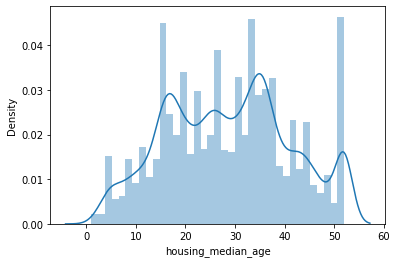

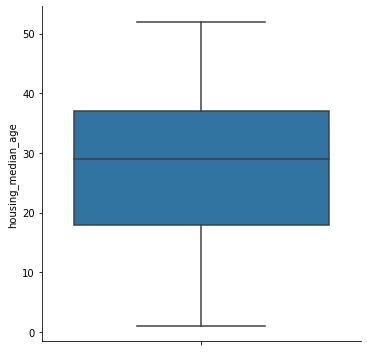

El histograma y boxplot para la variable total_rooms: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


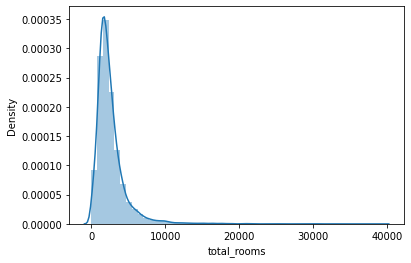

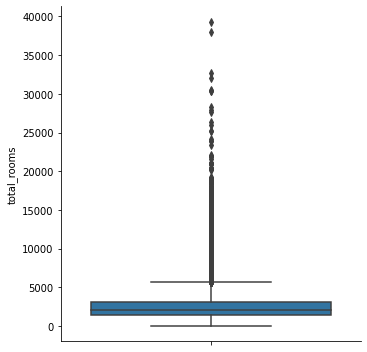

El histograma y boxplot para la variable total_bedrooms: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


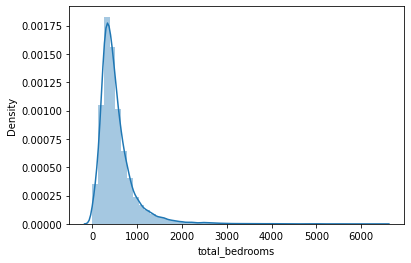

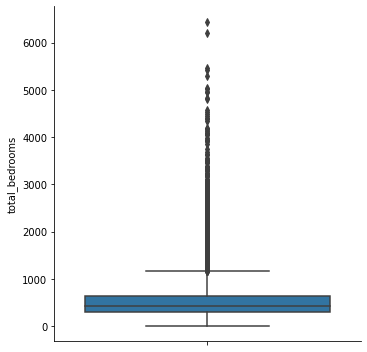

El histograma y boxplot para la variable population: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


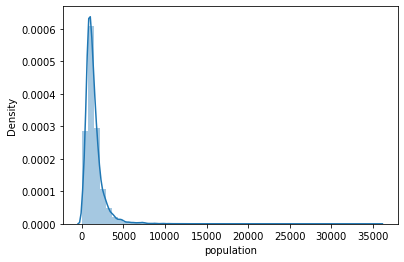

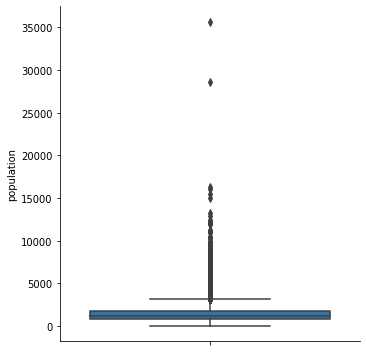

El histograma y boxplot para la variable households: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


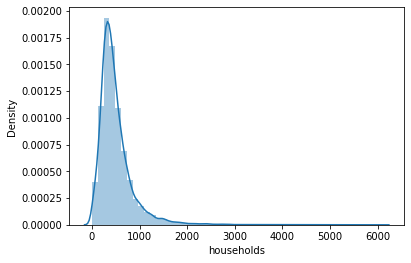

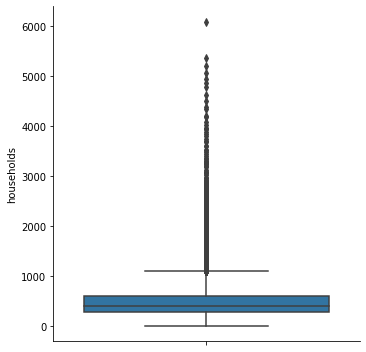

El histograma y boxplot para la variable median_income: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


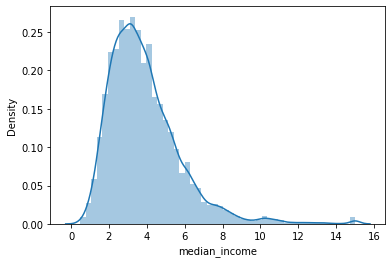

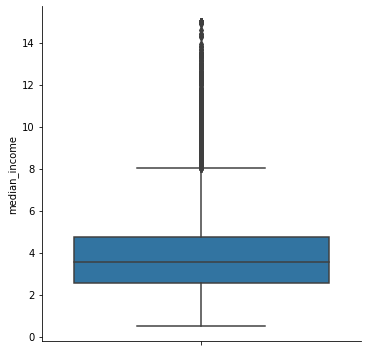

El histograma y boxplot para la variable median_house_value: 



c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


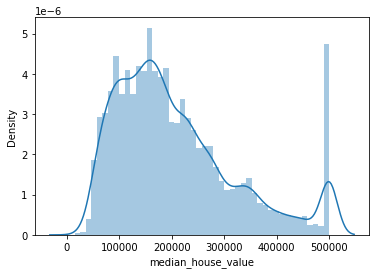

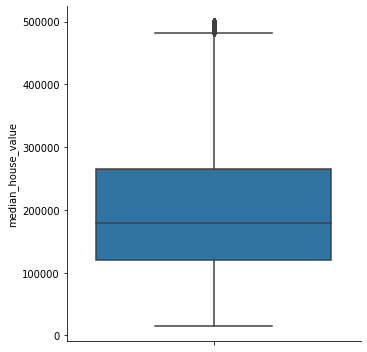

In [7]:
for col in numerical_features:
    print(f"El histograma y boxplot para la variable {col}: \n")
    histogram(data=housing, column=col)
    plt.show()
    boxplot(data=housing, column=col)
    plt.show()

* En general la mayoría de variables están sesgadas positivamente.
* Y corroboramos que housing_median_age parece distribuir normal.

In [8]:
zscore_features = ['housing_median_age']
iqr_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

#### Categóricas

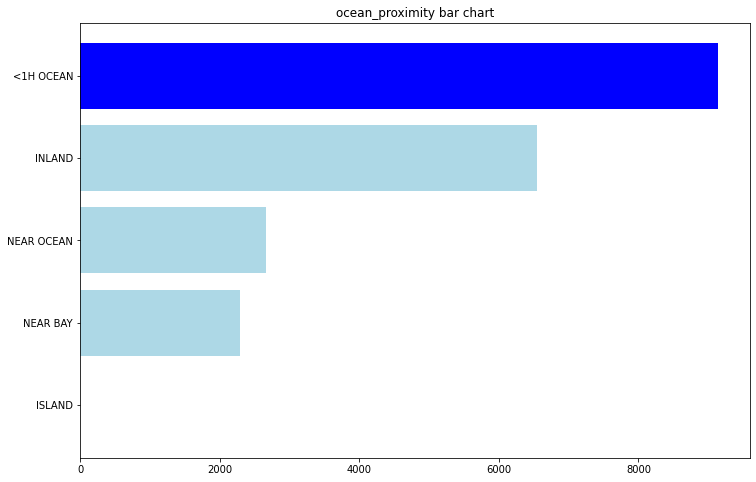

In [9]:
barplot(data=housing, column="ocean_proximity")

### Análisis bivariado

#### Continuas vs continuas

In [10]:
numerical_features.pop()

'median_house_value'

Para la variable housing_median_age: 



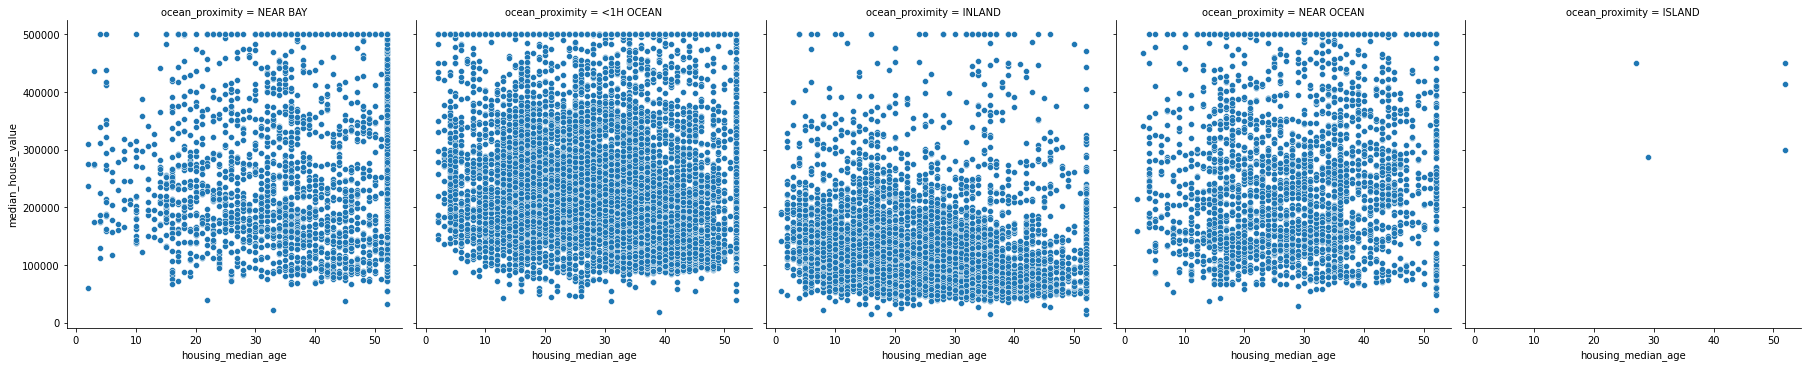

Para la variable total_rooms: 



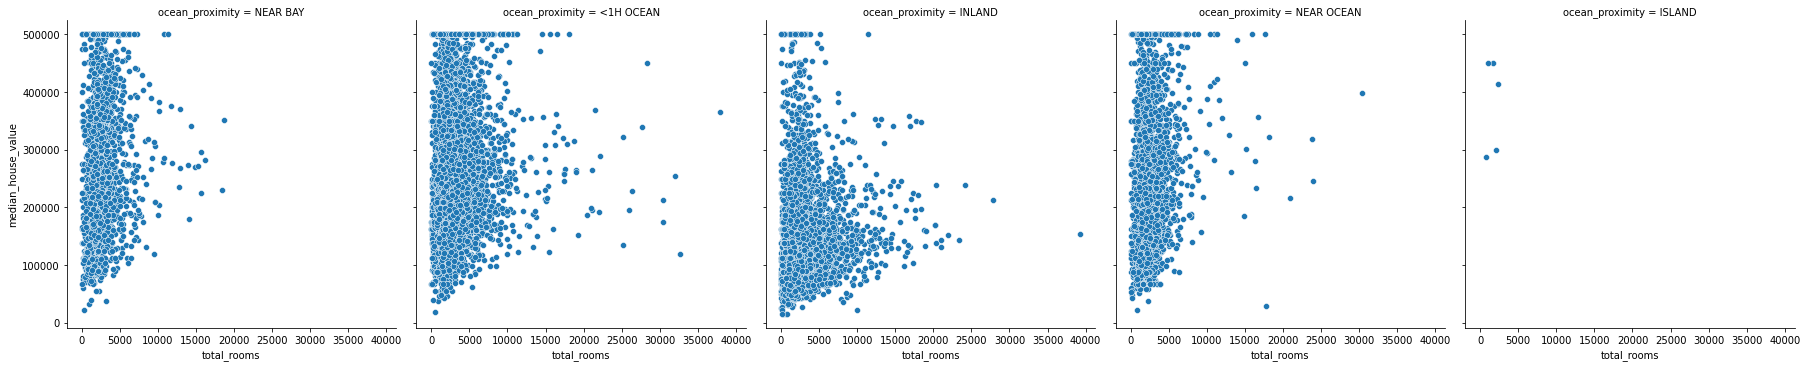

Para la variable total_bedrooms: 



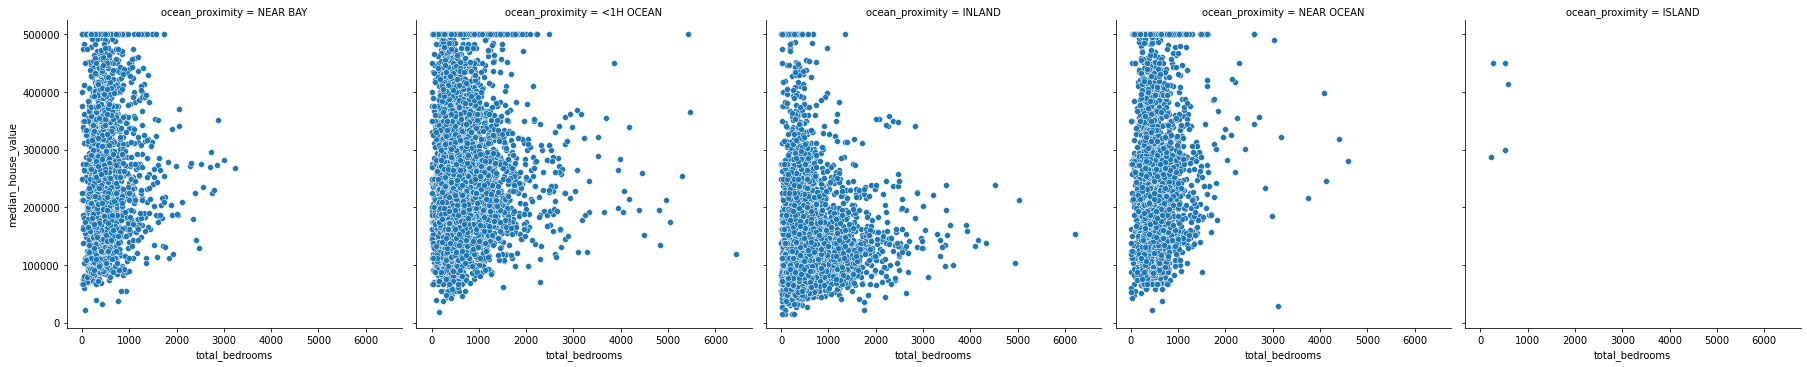

Para la variable population: 



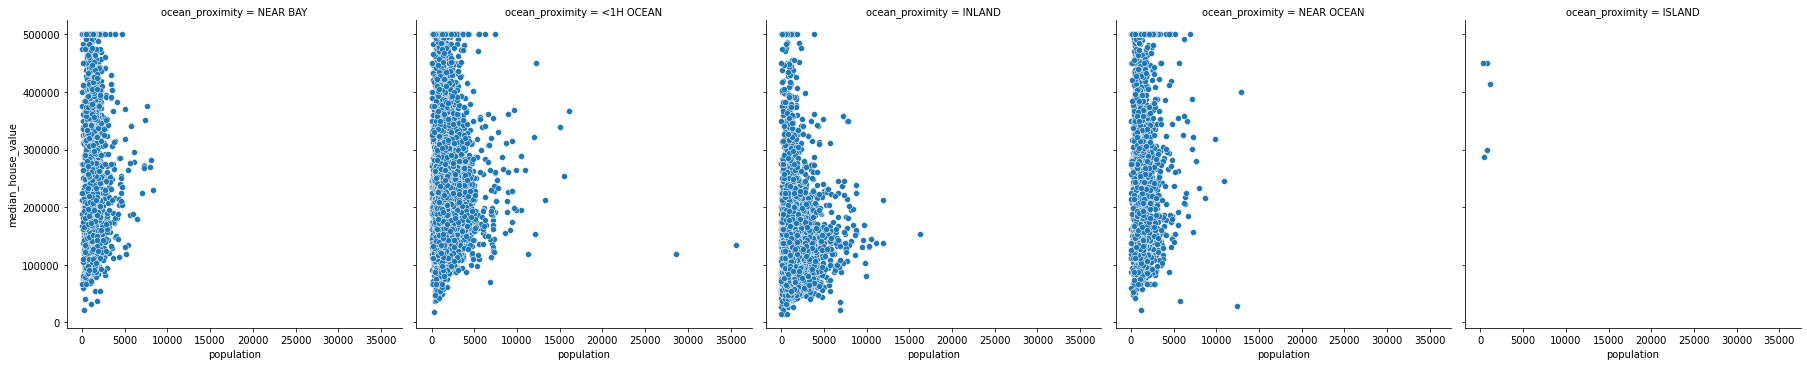

Para la variable households: 



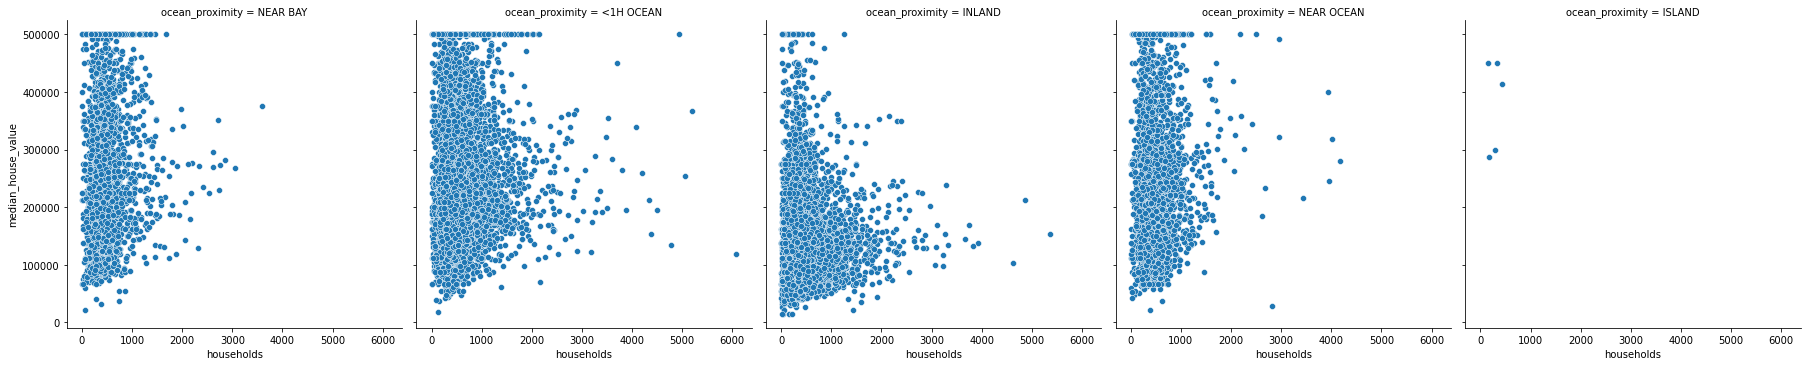

Para la variable median_income: 



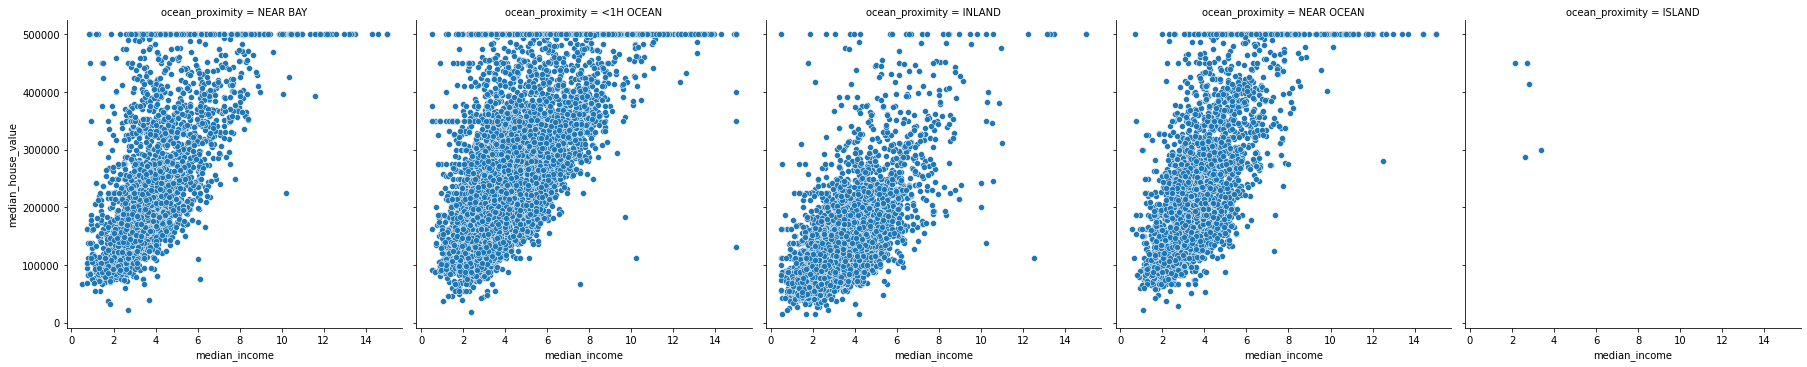

In [14]:
for col in numerical_features:
    print(f"Para la variable {col}: \n")
    scatterplot(data=housing, x=col, y="median_house_value", col="ocean_proximity")
    plt.show()

#### Categóricas vs continuas

* **ocean_proximity** vs **median_house_value**

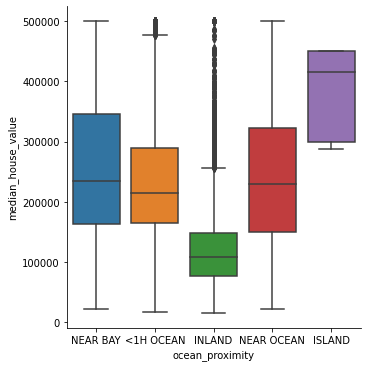

In [15]:
boxplot(data=housing, column="ocean_proximity", label="median_house_value")

### Análisis multivariado

#### Clustering - Gaussian Mixture Models (GMM)

In [16]:
numerical_features.append("median_house_value")

In [17]:
housing.isna().mean()

housing_median_age   0.00
total_rooms          0.00
total_bedrooms       0.01
population           0.00
households           0.00
median_income        0.00
median_house_value   0.00
ocean_proximity      0.00
dtype: float64

c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\stiven.lopez\pycharmprojects\ds-online-64\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


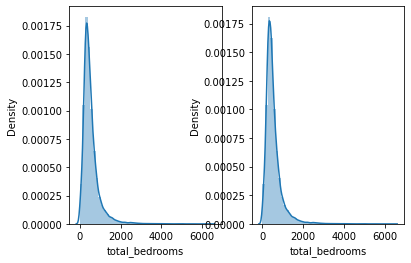

In [18]:
plot_imputations(df=housing, column='total_bedrooms', method="median")

In [28]:
X = housing[numerical_features]

In [30]:
imputer = SimpleImputer(strategy='median')
robust = RobustScaler()
standard = StandardScaler()

X = pd.DataFrame(imputer.fit_transform(X), columns=numerical_features)

In [31]:
iqr_features.append("median_house_value")

# Escalemos los datos con el robust scaler

X.loc[:, iqr_features] = robust.fit_transform(X[iqr_features])

# Escalamos los datos con el standard scaler
X.loc[:, zscore_features] = standard.fit_transform(X[zscore_features])

In [35]:
n_clusters = np.linspace(start=2, stop=20, num=10, dtype=int)

gmms = []

# gmms = [GaussianMixture(n_components=n, random_state=42).fit(X) for n in n_clusters]

for n in n_clusters:
    gmms.append(GaussianMixture(n_components=n, random_state=42).fit(X))

gmms

[GaussianMixture(n_components=2, random_state=42),
 GaussianMixture(n_components=4, random_state=42),
 GaussianMixture(n_components=6, random_state=42),
 GaussianMixture(n_components=8, random_state=42),
 GaussianMixture(n_components=10, random_state=42),
 GaussianMixture(n_components=12, random_state=42),
 GaussianMixture(n_components=14, random_state=42),
 GaussianMixture(n_components=16, random_state=42),
 GaussianMixture(n_components=18, random_state=42),
 GaussianMixture(n_components=20, random_state=42)]

In [36]:
aic = [model.aic(X) for model in gmms]
bic = [model.bic(X) for model in gmms]

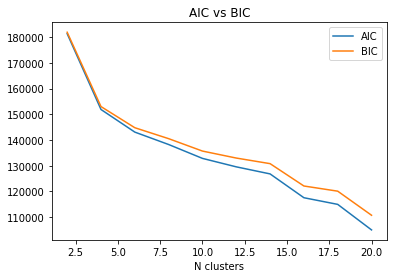

In [37]:
plt.plot(n_clusters, aic, label='AIC')
plt.plot(n_clusters, bic, label="BIC")
plt.legend(loc='best')
plt.title("AIC vs BIC")
plt.xlabel("N clusters")
plt.show()